In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
plt.style.use('seaborn-pastel')

In [4]:
df1 = pd.read_csv('/home/rashu/Desktop/Coding_Blocks/machine-learning-online-2018-master/Datasets/mnist_train.csv')


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
X = df1.values

In [6]:
X.shape

(42000, 785)

In [10]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df1.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [14]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(df1, 0.2)

In [20]:
train_set = train_set.values
test_set = test_set.values

In [21]:
X_train = train_set[:, 1:]

In [22]:
Y_train = train_set[:, 0]

In [25]:
Y_train

array([9, 9, 6, ..., 1, 8, 5])

In [26]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
X_test = test_set[:, 1:]

In [28]:
Y_test = test_set[: , 0]

In [31]:
Y_test.shape

(8400,)

In [43]:
def drawing(sample):
    image = sample.reshape((28,28))
    plt.imshow(image, cmap = 'gray')
    plt.show()

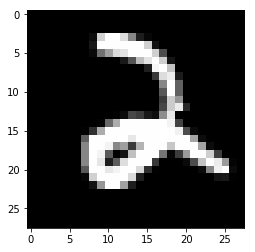

2


In [46]:
drawing(X_train[51])
print (Y_train[51])

In [48]:
def dist(x1, x2):
    return np.sqrt(sum((x2-x1)**2))

def knn(X, Y, querypoint, k=5):
    vals = []
    m = X.shape[0]
    for i in range (m):
        d = dist(querypoint, X[i])
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
        
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts = True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    

In [52]:
x = knn(X_train,Y_train,X_test[45])
print (x)

(array([6.]), array([5]))
6.0


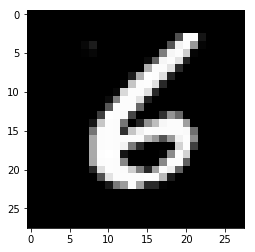

6


In [51]:
drawing(X_test[45])
print (Y_test[45])